In [34]:
import torch
import matplotlib.pyplot as plt 
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import PIL
import numpy as np

# downloading the training data

In [17]:
    training_data=FashionMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor()


    )

In [6]:
print(training_data)
print(training_data.data.shape)
print(training_data.targets)
print(training_data.classes)
print(training_data.class_to_idx)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
tensor([9, 0, 0,  ..., 3, 0, 5])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [14]:
print(len(training_data[0]))
img,label= training_data[0]
print(f'image is {img} \n and label is {label}')

2
image is tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.01

# Downloading the test set

In [16]:
test_data=FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()


)

In [18]:
print(test_data.data.shape)

torch.Size([10000, 28, 28])


## Visualizing FashionMNIST

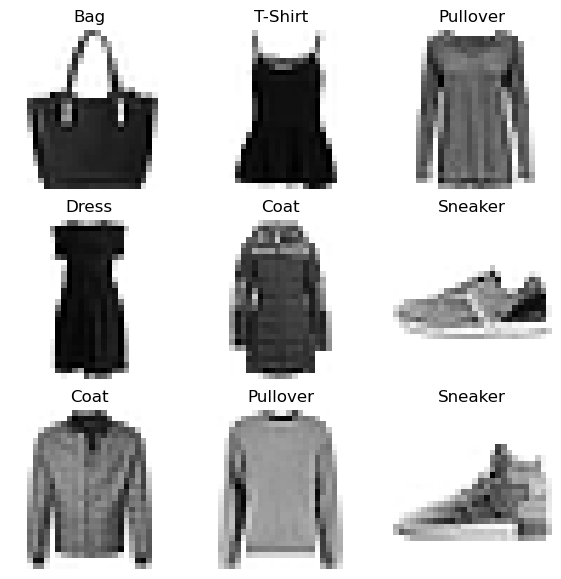

In [21]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(7, 7))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='binary')
plt.show()

## DataLoader

In [22]:
from torch.utils.data import DataLoader
training_dataloader =DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader= DataLoader(test_data, batch_size=32, shuffle=True)


In [41]:
train_features, train_labels = next(iter(training_dataloader))
print(f"Features batch size: {train_features.size()}")
print(f"Labels shape: {train_labels.size()}")


Features batch size: torch.Size([32, 1, 28, 28])
Labels shape: torch.Size([32])


Label: 1


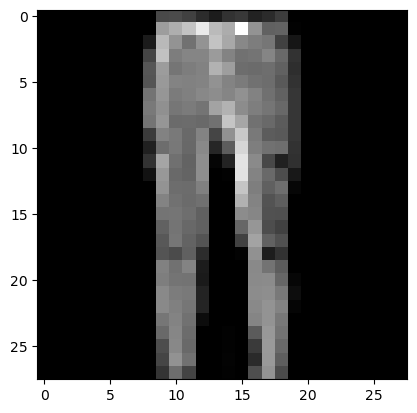

In [42]:
image = train_features[10].squeeze()
plt.imshow(image, cmap='gray')
print(f"Label: {train_labels[10]}")

# **Getting training device**

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"{device} is available.")

cuda is available.


# **Defining the Model**

**Model's architecture:**

Three layers:
* `Fully-connected Layer_1 --> (784, 64)`
* `Fully-connected Layer_2 --> (64, 64)`
* `Fully-connected Layer_3 --> (64, 10)`



In [44]:
import torch.nn as nn
import torch.nn.functional as F

There are two different ways to define the model

# Version 1

In [65]:
class SimpleNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

    

In [66]:
model1 = SimpleNN()
model1

SimpleNN(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

# Version 2

in this version we dont add the softmax at the output of model after getting the result we apply softmax 

In [69]:
class SimpleNNVersionTwo(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.sequential = nn.Sequential(
            nn.Linear(in_features=784, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.sequential(x)
        return x


In [70]:
model2 = SimpleNNVersionTwo()
model2

SimpleNNVersionTwo(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (sequential): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

we create a sample random with the same size of our image 1*28*28 to show that the out put of these models are the same but we have to apply softmax at the out put of the second version

In [71]:
sample = torch.rand(1, 28, 28)

version 1

In [72]:
results = model1(sample)
pred = results.argmax(dim=1)
pred

tensor([9])

version 2

In [79]:
logits = model2(sample)
pred_probab = nn.Softmax(dim=1)(logits)
pred = pred_probab.argmax(dim=1)

print(f"Predicted class: {pred}")

Predicted class: tensor([0])


In [81]:
for name, param in model2.named_parameters():
    print(f"Layer: {name} || Size: {param.size()} || Values: {param[:2]} \n")

Layer: sequential.0.weight || Size: torch.Size([64, 784]) || Values: tensor([[ 0.0157, -0.0325, -0.0001,  ...,  0.0334, -0.0108, -0.0240],
        [ 0.0282,  0.0081, -0.0167,  ...,  0.0139,  0.0223,  0.0239]],
       grad_fn=<SliceBackward0>) 

Layer: sequential.0.bias || Size: torch.Size([64]) || Values: tensor([-0.0183,  0.0197], grad_fn=<SliceBackward0>) 

Layer: sequential.2.weight || Size: torch.Size([64, 64]) || Values: tensor([[-0.0031,  0.1047, -0.0463,  0.0829, -0.1243, -0.0860, -0.0346, -0.0621,
         -0.0938, -0.0876, -0.0061,  0.0328, -0.0623, -0.0544, -0.1060,  0.0253,
          0.1033,  0.0317,  0.0166,  0.1178,  0.0983, -0.1162, -0.0102, -0.0056,
         -0.0236,  0.0036, -0.1101, -0.0224,  0.0786,  0.0159, -0.1038, -0.0492,
         -0.0062, -0.0590, -0.0734, -0.0633, -0.0848, -0.0486, -0.0396, -0.0181,
         -0.1008, -0.1007,  0.0963,  0.1147,  0.0493,  0.0581,  0.1246,  0.1065,
          0.0489,  0.0204, -0.1058,  0.1028, -0.0322,  0.1004,  0.0951, -0.0836,
   

# **Setting Loss Function**


in the crossentropy loss , softmax was implemented , if you used this loss function you dont need to apply softmax

In [82]:
# loss function = criterion
loss_fn = nn.CrossEntropyLoss() 

# **Setting Hyperparameters**

In [91]:
learning_rate = 1e-3
batch_size = 64
n_epochs = 25

# **Setting the Optimizer**

In [86]:
import torch.optim as optim
optimizer = optim.SGD(model2.parameters(), lr=learning_rate)

# **Optimization Loop**

In [87]:
def train(dataloader, model, loss_fn, optimizer):
    for batch, (X, y) in enumerate(dataloader):

        # generate predictions
        pred = model(X)

        # calculate loss
        loss = loss_fn(pred, y)

        # reset gradients
        optimizer.zero_grad()

        # compute gradients
        loss.backward()

        # update parameters w, b
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            current = batch * len(X)
            print(f"Loss: {loss:>.4f} --- [{current:>5d}] out of {len(dataloader.dataset):>5d}")


def test(dataloader, model, loss_fn):
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:

            pred = model(X) 

            loss = loss_fn(pred, y)

            test_loss += loss.item()
            correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()

        test_loss /= len(dataloader.dataset)
        correct /= len(dataloader.dataset)

        print(f"\nResults: Accuracy: {(100 * correct):>0.1f}%, Average Loss: {test_loss:>8f} \n")

In [92]:
for epoch in range(n_epochs):
    print(f"[Epoch {epoch+1}]\n")
    train(training_dataloader, model2, loss_fn, optimizer)
    test(test_dataloader, model2, loss_fn)
print('Completed!')

[Epoch 1]

Loss: 0.6119 --- [    0] out of 60000
Loss: 0.5817 --- [ 3200] out of 60000
Loss: 0.4572 --- [ 6400] out of 60000
Loss: 0.6578 --- [ 9600] out of 60000
Loss: 0.3542 --- [12800] out of 60000
Loss: 0.5658 --- [16000] out of 60000
Loss: 0.3030 --- [19200] out of 60000
Loss: 0.5520 --- [22400] out of 60000
Loss: 0.5018 --- [25600] out of 60000
Loss: 0.3063 --- [28800] out of 60000
Loss: 0.2086 --- [32000] out of 60000
Loss: 0.6208 --- [35200] out of 60000
Loss: 0.5732 --- [38400] out of 60000
Loss: 0.3323 --- [41600] out of 60000
Loss: 0.4402 --- [44800] out of 60000
Loss: 0.3812 --- [48000] out of 60000
Loss: 0.4404 --- [51200] out of 60000
Loss: 0.8866 --- [54400] out of 60000
Loss: 0.5070 --- [57600] out of 60000

Results: Accuracy: 81.0%, Average Loss: 0.017088 

[Epoch 2]

Loss: 1.0893 --- [    0] out of 60000
Loss: 0.3765 --- [ 3200] out of 60000
Loss: 0.3021 --- [ 6400] out of 60000
Loss: 0.6839 --- [ 9600] out of 60000
Loss: 0.3724 --- [12800] out of 60000
Loss: 0.5136 -

# **Model Saving and Loading**

version 1: using state dict : just saving the weights

In [93]:
torch.save(model2.state_dict(), "model_weights.pth")

In [94]:
mode2_1 = SimpleNNVersionTwo()
mode2_1.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

## Saving and Loading Models with Shapes

In [95]:
torch.save(model2, 'model_shapes.pth')

mode2_2 = torch.load('model_shapes.pth')

# **Making Predictions**


In [96]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [97]:
mode2_2.eval()

x, y = test_data[2][0], test_data[2][1]

with torch.no_grad():
    pred = mode2_2(x)
    predicted, actual = classes[pred[0].argmax(dim=0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Trouser", Actual: "Trouser"
